# Escuchar pitch, preparando audios y funciones

> > https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html

In [1]:
# We require to install the following packages:
# !pip install torchaudio librosa

import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

1.11.0
0.11.0


In [2]:
import os
import librosa
import matplotlib.pyplot as plt
import requests
from IPython.display import Audio, display

In [3]:
def _get_sample(path, resample=None):
    effects = [["remix", "1"]]
    if resample:
        effects.extend(
            [
                ["lowpass", f"{resample // 2}"],
                ["rate", f"{resample}"],
            ]
        )
    return torchaudio.sox_effects.apply_effects_file(path, effects=effects)

def get_speech_sample(audio_path='', resample=None):
    return _get_sample(audio_path, resample=resample)

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)

def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("Waveform with more than 2 channels are not supported.")

In [4]:
_SAMPLE_DIR = "_assets"
audio_path_1 = os.path.join(_SAMPLE_DIR, "100Hz_44100Hz_16bit_05sec.wav")
audio_path_2 = os.path.join(_SAMPLE_DIR, "440Hz_44100Hz_16bit_05sec.wav")
audio_path_3 = os.path.join(_SAMPLE_DIR, "10kHz_44100Hz_16bit_05sec.wav")
os.makedirs(_SAMPLE_DIR, exist_ok=True)

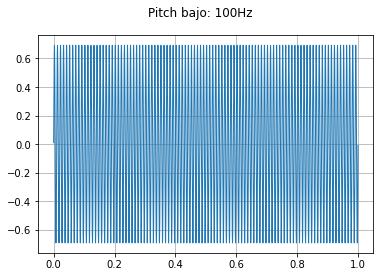

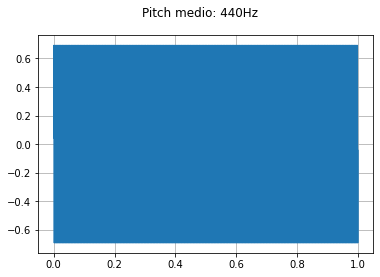

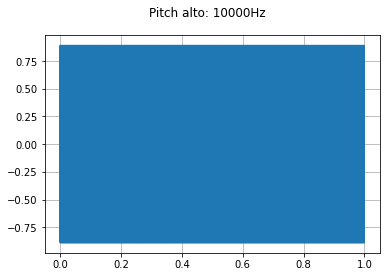

In [5]:
waveform1, sample_rate = get_speech_sample(audio_path_1)
waveform2, sample_rate = get_speech_sample(audio_path_2)
waveform3, sample_rate = get_speech_sample(audio_path_3)

muestra1 = waveform1[:,1:44100]
plot_waveform(muestra1, sample_rate, title="Pitch bajo: 100Hz")
play_audio(muestra1, sample_rate)

muestra2 = waveform2[:,1:44100]
plot_waveform(muestra2, sample_rate, title="Pitch medio: 440Hz")
play_audio(muestra2, sample_rate)

muestra3 = waveform3[:,1:44100]
plot_waveform(muestra3, sample_rate, title="Pitch alto: 10000Hz")
play_audio(muestra3, sample_rate)

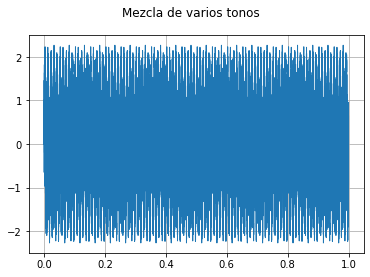

In [6]:
muestra1 = waveform1[:,1:44100]
muestra2 = waveform2[:,1:44100]
muestra3 = waveform3[:,1:44100]
sum      = muestra1 + muestra2 + muestra3
plot_waveform(sum, sample_rate, title="Mezcla de varios tonos")
play_audio(sum, sample_rate)
torchaudio.save('suma.wav', sum, sample_rate)